In [1]:
import tensorflow as tf
from tensorflow import keras
from keras import layers, datasets, models
import matplotlib.pyplot as plt


In [3]:
physical_devices = tf.config.list_physical_devices("GPU")
tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [2]:
data = datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = data.load_data()

4422102/4422102 [==============================] - 2s 0us/step


In [4]:
x_train = x_train.reshape(len(x_train),len(x_train[0]),len(x_train[0][0]),1)/255.0
x_test = x_test.reshape(len(x_test),len(x_test[0]),len(x_test[0][0]),1)/255.0

In [5]:
len(x_train[3])

28

In [6]:
model = models.Sequential([
    layers.Conv2D(64,(3,3),activation='relu',input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(128,activation='relu'),
    layers.Dense(10,activation='softmax')
])

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 128)               2

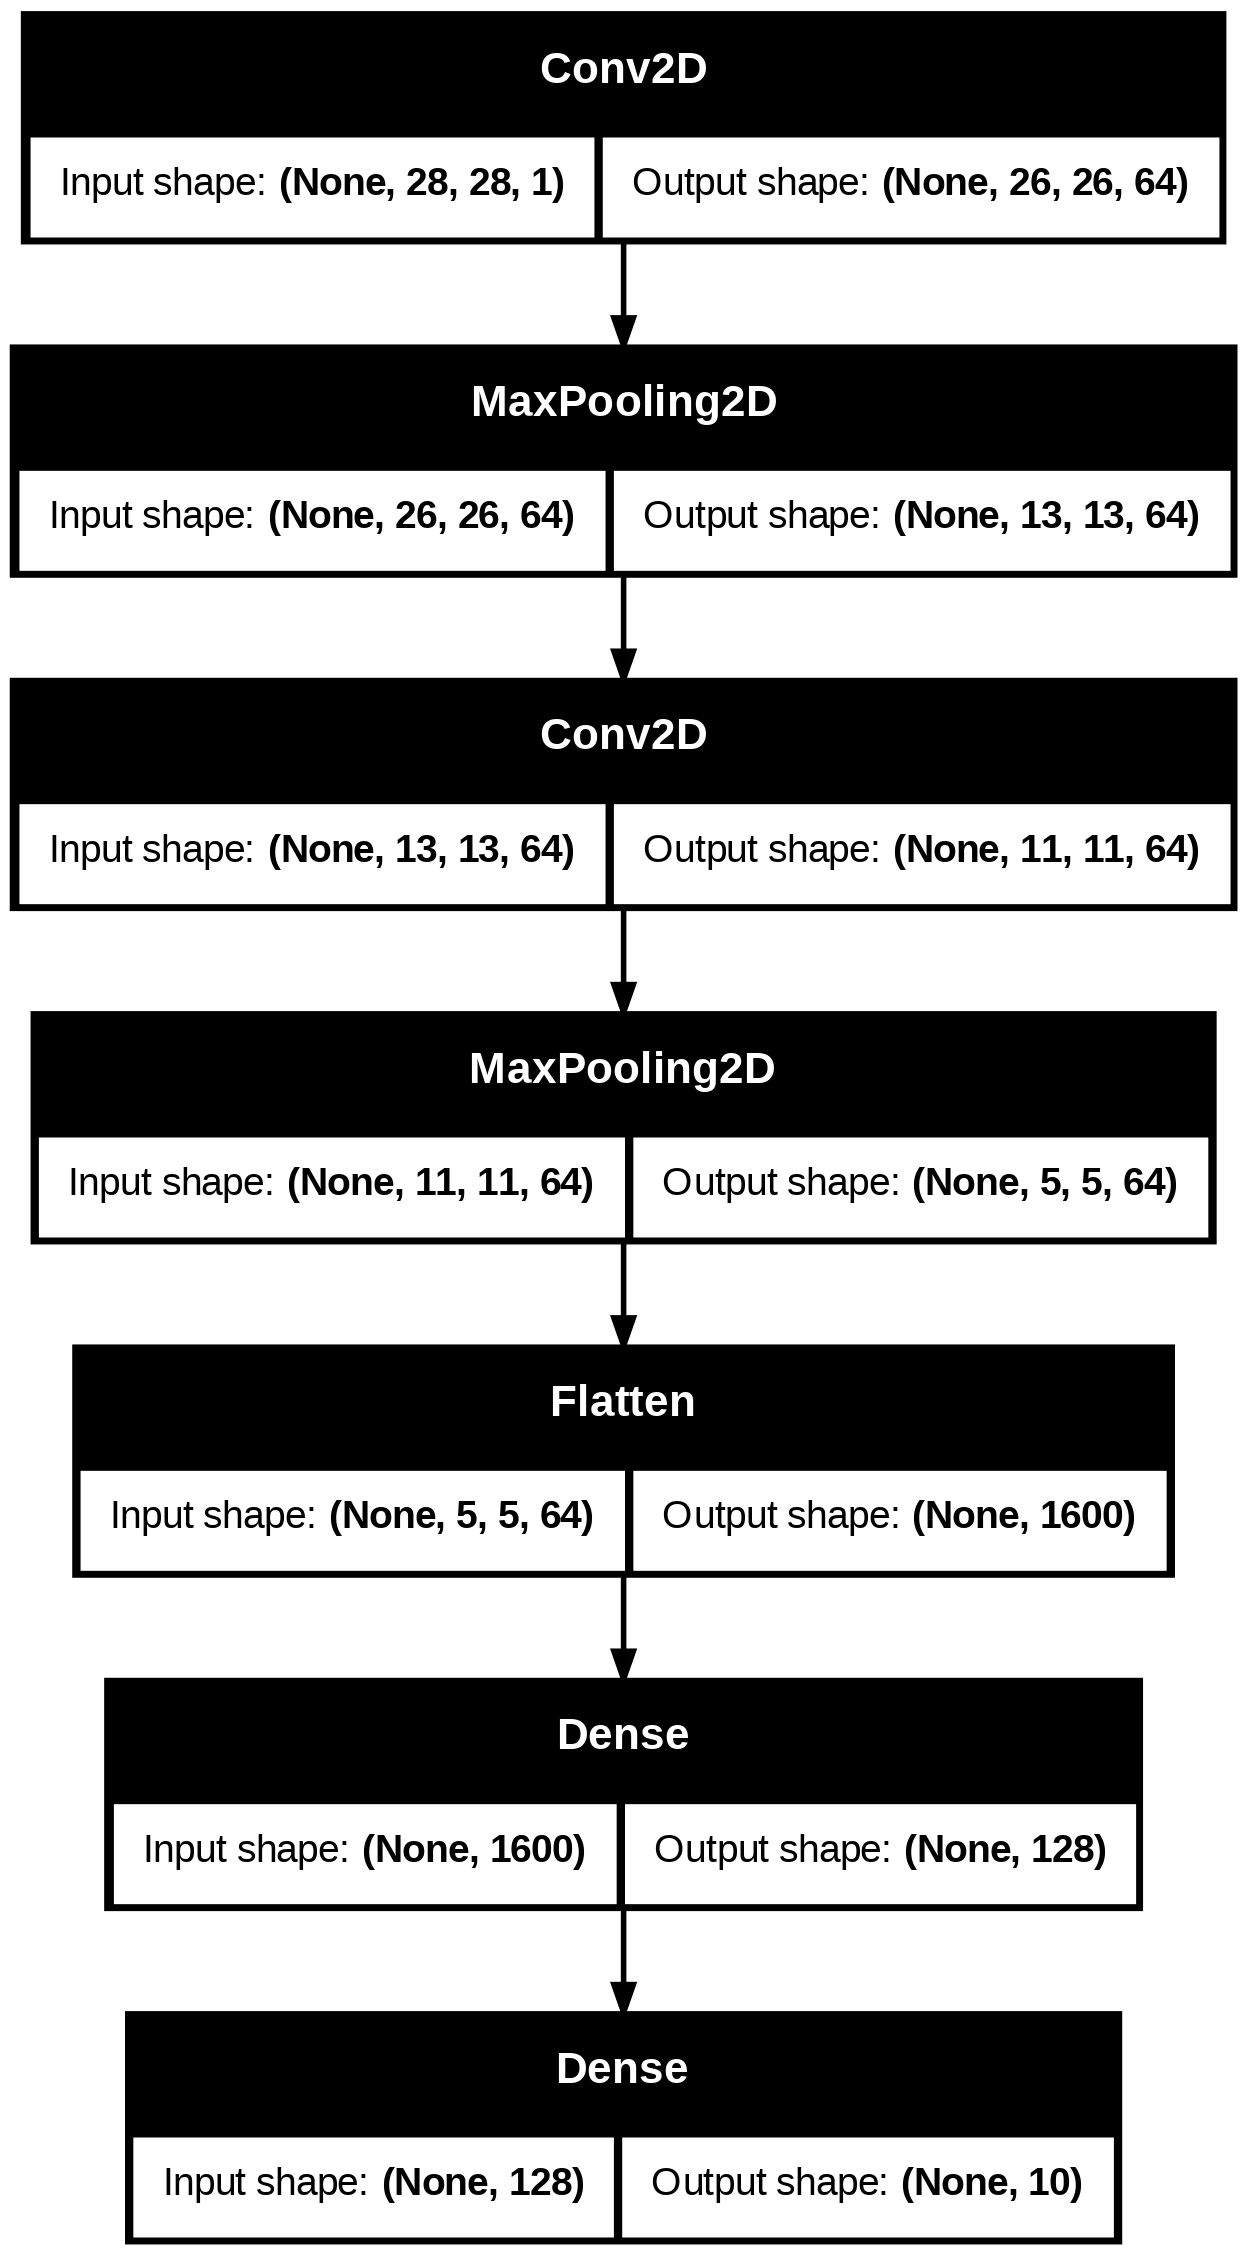

In [65]:
keras.utils.plot_model(model,show_shapes=True)

In [8]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [10]:
class myCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        # Check training accuracy
        if logs.get('accuracy') > 0.95:
            print("\nReached 95% accuracy so cancelling training!")
            self.model.stop_training = True

callbacks = myCallback()

In [13]:
history = model.fit(x_train,y_train,epochs=50,batch_size=30,validation_data=(x_test, y_test))

Epoch 1/50
2000/2000 [==============================] - 15s 7ms/step - loss: 0.1153 - accuracy: 0.9562 - val_loss: 0.3170 - val_accuracy: 0.9038
Epoch 2/50
2000/2000 [==============================] - 15s 7ms/step - loss: 0.1008 - accuracy: 0.9624 - val_loss: 0.3058 - val_accuracy: 0.9127
Epoch 3/50
2000/2000 [==============================] - 15s 7ms/step - loss: 0.0877 - accuracy: 0.9669 - val_loss: 0.3293 - val_accuracy: 0.9097
Epoch 4/50
2000/2000 [==============================] - 15s 7ms/step - loss: 0.0780 - accuracy: 0.9702 - val_loss: 0.3574 - val_accuracy: 0.9072
Epoch 5/50
2000/2000 [==============================] - 15s 8ms/step - loss: 0.0692 - accuracy: 0.9738 - val_loss: 0.3611 - val_accuracy: 0.9092
Epoch 6/50
2000/2000 [==============================] - 15s 7ms/step - loss: 0.0602 - accuracy: 0.9774 - val_loss: 0.4003 - val_accuracy: 0.9111
Epoch 7/50
2000/2000 [==============================] - 15s 7ms/step - loss: 0.0556 - accuracy: 0.9798 - val_loss: 0.4014 - val_ac

In [14]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 1.0865 - accuracy: 0.9015


[1.0865375995635986, 0.9014999866485596]

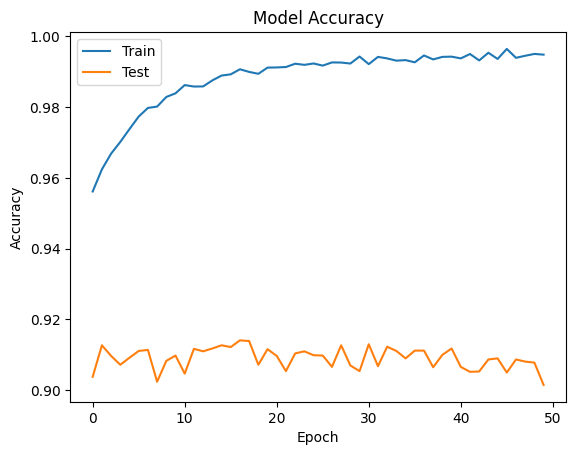

In [15]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()